# Setup

In [61]:
!pip install -q --upgrade pyreadstat

In [ ]:
!pip install missingno

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import missingno as msno
import statsmodels.api as sm

In [63]:
!pip install semopy

     |████████████████████████████████| 153kB 5.6MB/s 
  Created wheel for semopy: filename=semopy-2.0.15-cp36-none-any.whl size=152552 sha256=aa5763f9817ba9c8f099b43ab693d64b335b019ca93fb018aba68a713ef22ab1
  Stored in directory: /root/.cache/pip/wheels/3a/43/01/9ab1f86e27d5a7fe90dc26c52115ffddd6d262a7d857cc688d
Successfully built semopy


In [65]:
# click the link and delete the line "default = (None,None)
# "Operation = namedtuple('Operation', 'name, params, onto')
from semopy import Model 
import semopy

# Demo

In [ ]:
from semopy import Model
from semopy.examples import political_democracy
desc = political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [ ]:
data = political_democracy.get_data()
data

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679
...,...,...,...,...,...,...,...,...,...,...,...
71,5.40,9.999998,6.666666,3.333333,3.750000,6.666666,6.666666,1.485166,4.477337,3.091042,1.987909
72,7.50,8.800000,9.999998,6.066666,7.500000,6.666666,9.999998,6.666666,5.337538,5.631212,3.491004
73,7.50,7.000000,9.999998,6.852998,7.500000,6.348340,6.666666,7.508044,6.129050,6.403574,5.001796
74,10.00,6.666666,9.999998,10.000000,10.000000,6.666666,9.999998,10.000000,5.003946,4.962845,3.976994


In [ ]:
mod = Model(desc)

In [ ]:
res = mod.fit(data, obj = "GLS")

In [ ]:
print(res)

Name of objective: GLS
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully.
Objective value: 0.972
Number of iterations: 49
Params: 2.301 1.977 1.372 1.074 1.279 1.300 1.381 1.312 1.755 0.667 0.809 0.413 1.393 1.412 1.264 6.064 0.698 4.027 0.293 2.746 0.958 3.667 1.859 0.147 2.791 0.187 3.528 0.399 2.888 0.052 0.317


In [ ]:
estimates = mod.inspect()
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,dem60,~,ind60,1.755082,0.444993,3.94406,8.01119e-05
1,dem65,~,ind60,0.667077,0.240151,2.77774,0.00547387
2,dem65,~,dem60,0.809389,0.0919303,8.80438,0
3,x1,~,ind60,1.000000,-,-,-
4,x2,~,ind60,2.300913,0.150928,15.2451,0
5,x3,~,ind60,1.976942,0.165856,11.9196,0
6,y1,~,dem60,1.000000,-,-,-
7,y2,~,dem60,1.371870,0.174067,7.88126,3.33067e-15
8,y3,~,dem60,1.073968,0.139299,7.70978,1.26565e-14
9,y4,~,dem60,1.279121,0.135007,9.47448,0


In [ ]:
stats = semopy.calc_stats(mod)
print(stats.T.round(3))

                 Value
DoF             35.000
DoF Baseline    55.000
chi2            72.865
chi2 p-value     0.000
chi2 Baseline  230.927
CFI              0.785
GFI              0.684
AGFI             0.504
NFI              0.684
TLI              0.662
RMSEA            0.121
AIC             60.307
BIC            132.149
LogLik           0.847


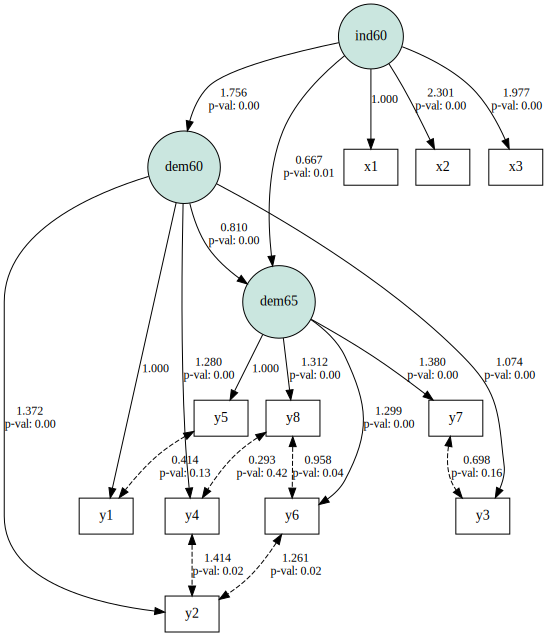

In [ ]:
g = semopy.semplot(mod, 'model.png', plot_covs=True)
g

# Data Preprocess

Dataset: **Airline Passenger Satisfaction**

https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

This dataset contains an airline passenger satisfaction survey. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
df = pd.read_csv("train.csv")
df.drop(columns="Unnamed: 0", inplace = True)

In [ ]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
df =df[df.columns[6:20]] 

In [ ]:
df.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [ ]:
df.columns = ['Inflight_wifi_service', 'Departure_Arrival_time_convenient',
       'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On_board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness']

In [ ]:
df.head()

,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [ ]:
from sklearn import preprocessing

arr_df = df.to_numpy()
df_scaled = preprocessing.StandardScaler().fit_transform(arr_df)
df_scaled

array([[ 0.20357895,  0.6161719 ,  0.17377614, ...,  0.5497986 ,
         1.15643582,  1.30586973],
       [ 0.20357895, -0.69524516,  0.17377614, ..., -1.82101248,
         0.30584786, -1.74229153],
       [-0.54953343, -0.69524516, -0.54105962, ...,  0.5497986 ,
         0.30584786,  1.30586973],
       ...,
       [-1.30264581, -1.35095368, -1.25589538, ...,  1.34006895,
         1.15643582,  0.54382941],
       [-1.30264581, -1.35095368, -1.25589538, ...,  1.34006895,
         0.30584786, -1.74229153],
       [-1.30264581, -0.03953663,  0.17377614, ...,  0.5497986 ,
        -0.54474009, -1.74229153]])

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
df_scaled

,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,1.156436,1.305870
1,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.253380,-0.535045,-1.821012,0.305848,-1.742292
2,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,0.305848,1.305870
3,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.253380,-0.535045,-1.821012,0.305848,-0.980251
4,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.493270,0.311769,-0.240472,-0.544740,-0.218211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,-0.296785,-1.787061,0.311769,-1.030742,-0.544740,-0.980251
103900,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,1.255590,1.253380,1.158582,1.340069,1.156436,0.543829
103901,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,-0.296785,-1.026951,0.311769,1.340069,1.156436,0.543829
103902,-1.302646,-1.350954,-1.255895,1.583511,-1.656326,-1.667559,-1.849315,-1.769081,0.479403,1.253380,-2.228672,1.340069,0.305848,-1.742292


# Confirmatory Factor Analysis (Measurement Model)


In [ ]:
# ~~ = correlation, ~ = cause, =~ = measurement
eq = """# measurement model
Comfort =~ Food_and_drink + Seat_comfort + Inflight_entertainment + Cleanliness
Service =~ On_board_service + Baggage_handling + Inflight_service
Convenience =~ Inflight_wifi_service + Departure_Arrival_time_convenient + Ease_of_Online_booking + Gate_location
# residual correlations
Comfort ~~ Service
Service ~~ Convenience
Convenience ~~ Comfort
"""

In [ ]:
mod = Model(eq)

In [ ]:
res_opt = mod.fit(df_scaled)
estimates = mod.inspect(std_est=True)

In [ ]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully.
Objective value: 0.587
Number of iterations: 1
Params: 1.014 1.087 1.138 1.130 1.191 0.634 1.193 0.653 0.137 0.570 0.044 0.464 0.045 0.594 0.430 0.326 0.342 0.262 0.408 0.406 0.536 0.761 0.155 0.746 0.414


In [ ]:
df_estimates = pd.DataFrame(estimates)
df_estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,Food_and_drink,~,Comfort,1.000000,0.754734,-,-,-
1,Seat_comfort,~,Comfort,1.013943,0.765210,0.00417262,242.999,0
2,Inflight_entertainment,~,Comfort,1.087442,0.820746,0.0041661,261.022,0
3,Cleanliness,~,Comfort,1.137797,0.858758,0.00419359,271.318,0
4,On_board_service,~,Service,1.000000,0.681165,-,-,-
5,Baggage_handling,~,Service,1.130035,0.769725,0.00582598,193.965,0
6,Inflight_service,~,Service,1.191125,0.811356,0.00614003,193.993,0
7,Inflight_wifi_service,~,Convenience,1.000000,0.770709,-,-,-
8,Departure_Arrival_time_convenient,~,Convenience,0.634162,0.488839,0.00417174,152.014,0
9,Ease_of_Online_booking,~,Convenience,1.192631,0.919132,0.00538826,221.339,0


### Construct Reliability(CR) & Average Variance Extracted(AVE)

In [ ]:
df_target = df_estimates.iloc[7:11,4] # 我要抓的是標準化的factor loading，所以在inspect那邊加一個parameter（std_est = True）
loading = df_target.to_numpy()

In [ ]:
# Average Variance Extracted
sum_sq_loading = np.dot(loading.T,loading)
AVE = sum_sq_loading / len(loading)
AVE

0.48283379401480075

In [ ]:
# Construct Reliability
sum_loading = np.sum(loading)
sq_loading = np.square(loading)
error = 1 - sq_loading
sum_error = np.sum(error)
sq_sum_loading = np.square(sum_loading)
CR = sq_sum_loading / (sq_sum_loading + sum_error)
CR

0.7766765819727962

In [ ]:
loading

array([0.77070915, 0.48883856, 0.91913242, 0.50356236])

In [ ]:
df_estimates.to_csv('CFA_result.csv')

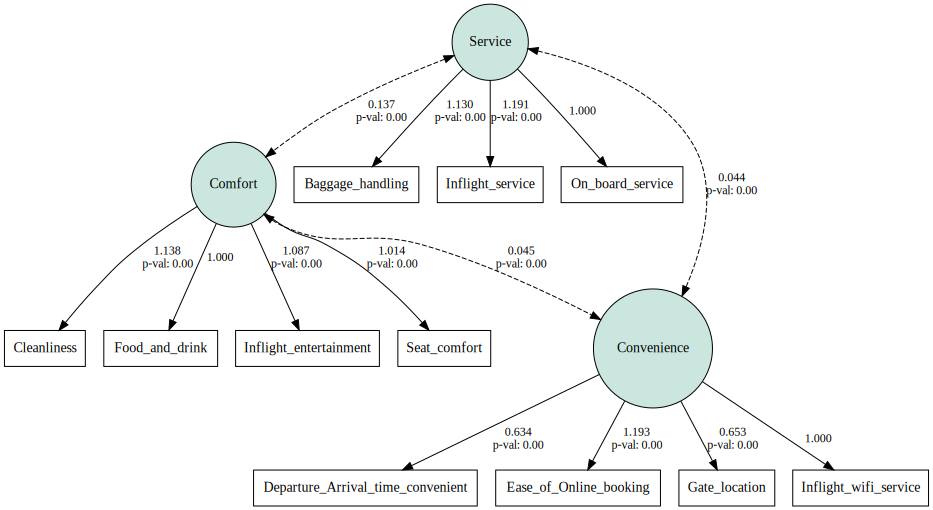

In [ ]:
viz = semopy.semplot(mod, 'model.png', plot_covs=True)
viz

In [ ]:
stats = semopy.calc_stats(mod)
print(stats.T.round(3))

                    Value
DoF                41.000
DoF Baseline       55.000
chi2            61011.116
chi2 p-value        0.000
chi2 Baseline  498306.893
CFI                 0.878
GFI                 0.878
AGFI                0.836
NFI                 0.878
TLI                 0.836
RMSEA               0.120
AIC                48.826
BIC               287.606
LogLik              0.587


# Path Analysis (Linear Regression)

在path analysis的時候要自己加variance的estimation，不然他在矩陣運算的時候會消掉它。

In [ ]:
eq = """# structural regression
On_board_service ~ Food_and_drink + Seat_comfort + Inflight_entertainment + Cleanliness
Inflight_service ~ On_board_service
# residual correlations
Food_and_drink ~~ Seat_comfort
Food_and_drink ~~ Inflight_entertainment
Food_and_drink ~~ Cleanliness
Seat_comfort ~~ Inflight_entertainment
Seat_comfort ~~ Cleanliness
Inflight_entertainment ~~ Cleanliness
# exogenous variance
Food_and_drink ~~ Food_and_drink
Seat_comfort ~~ Seat_comfort
Inflight_entertainment ~~ Inflight_entertainment
Cleanliness ~~ Cleanliness
"""

In [ ]:
mod = Model(eq)

In [ ]:
res_opt = mod.fit(df)
estimates = mod.inspect()

In [ ]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully.
Objective value: 0.126
Number of iterations: 11
Params: -0.238 -0.043 0.708 -0.189 0.503 1.008 1.103 1.148 1.768 1.074 1.175 1.740 1.210 1.777 1.722 0.963 1.221


In [ ]:
df_estimates = pd.DataFrame(estimates)
df_estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,On_board_service,~,Food_and_drink,-0.237570,0.003647,-65.137932,0.0
1,On_board_service,~,Seat_comfort,-0.042819,0.003721,-11.508840,0.0
2,On_board_service,~,Inflight_entertainment,0.708468,0.003829,185.005194,0.0
3,On_board_service,~,Cleanliness,-0.189291,0.004253,-44.506176,0.0
4,Inflight_service,~,On_board_service,0.502586,0.002363,212.673821,0.0
5,Food_and_drink,~~,Seat_comfort,1.007630,0.006275,160.584722,0.0
6,Food_and_drink,~~,Inflight_entertainment,1.103239,0.006476,170.350756,0.0
7,Food_and_drink,~~,Cleanliness,1.147589,0.006478,177.138796,0.0
8,Food_and_drink,~~,Food_and_drink,1.767640,0.007755,227.929814,0.0
9,Seat_comfort,~~,Inflight_entertainment,1.073609,0.006391,167.980575,0.0


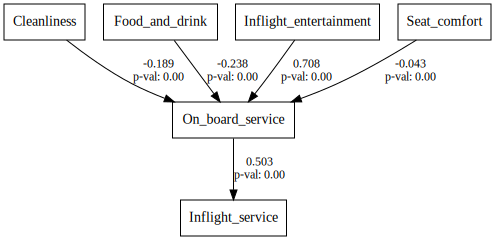

In [ ]:
viz = semopy.semplot(mod, 'model.png')
viz

In [ ]:
stats = semopy.calc_stats(mod)
print(stats.T.round(3))

                    Value
DoF                 4.000
DoF Baseline       15.000
chi2            13090.516
chi2 p-value        0.000
chi2 Baseline  293943.430
CFI                 0.955
GFI                 0.955
AGFI                0.833
NFI                 0.955
TLI                 0.833
RMSEA               0.177
AIC                33.748
BIC               196.119
LogLik              0.126


# Structural Equation Modelling (SEM)

In [ ]:
# ~~ = correlation, ~ = cause, =~ = measurement
eq = """# measurement model
Comfort =~ Food_and_drink + Seat_comfort + Inflight_entertainment + Cleanliness
Service =~ On_board_service + Baggage_handling + Inflight_service
Convenience =~ Inflight_wifi_service + Departure_Arrival_time_convenient + Ease_of_Online_booking + Gate_location
# structural regression
Comfort ~ Service + Convenience
# residual correlations
Service ~~ Convenience
"""

In [ ]:
mod = Model(eq)

In [ ]:
res_opt = mod.fit(df)
estimates = mod.inspect()

In [ ]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully.
Objective value: 0.587
Number of iterations: 24
Params: 1.006 1.090 1.123 1.036 1.087 0.728 1.256 0.629 0.300 0.054 0.075 0.770 1.218 0.568 1.769 0.580 0.715 0.304 0.452 0.472 0.761 0.721 0.932 0.890 1.048


In [ ]:
df_estimates = pd.DataFrame(estimates)
df_estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Comfort,~,Service,0.299646,0.00432374,69.3024,0
1,Comfort,~,Convenience,0.053939,0.00337574,15.9784,0
2,Food_and_drink,~,Comfort,1.000000,-,-,-
3,Seat_comfort,~,Comfort,1.005844,0.0041395,242.987,0
4,Inflight_entertainment,~,Comfort,1.090308,0.00417671,261.045,0
5,Cleanliness,~,Comfort,1.123081,0.00413901,271.34,0
6,On_board_service,~,Service,1.000000,-,-,-
7,Baggage_handling,~,Service,1.036137,0.00534266,193.936,0
8,Inflight_service,~,Service,1.087288,0.00560569,193.961,0
9,Inflight_wifi_service,~,Convenience,1.000000,-,-,-


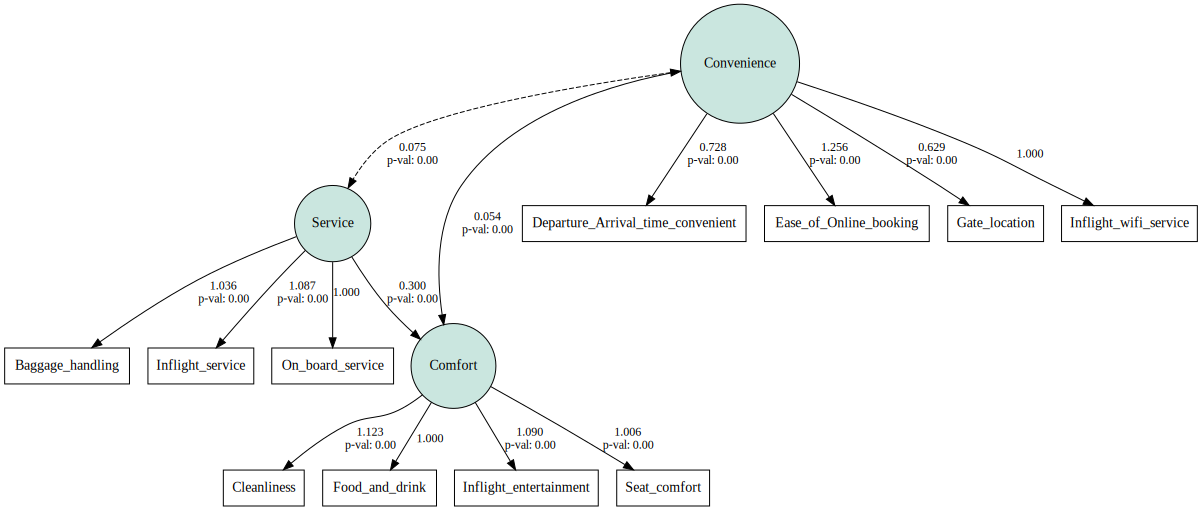

In [ ]:
viz = semopy.semplot(mod, 'model.png', plot_covs=True)
viz

In [ ]:
stats = semopy.calc_stats(mod)
print(stats.T.round(3))

                    Value
DoF                41.000
DoF Baseline       55.000
chi2            61011.141
chi2 p-value        0.000
chi2 Baseline  498306.944
CFI                 0.878
GFI                 0.878
AGFI                0.836
NFI                 0.878
TLI                 0.836
RMSEA               0.120
AIC                48.826
BIC               287.606
LogLik              0.587


# Tryna Replicate (Polynomial Regression - Religion & Sci.)

In [128]:
!pip install -q --upgrade pyreadstat

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import missingno as msno
import statsmodels.api as sm

In [193]:
df = pd.read_spss("data.sav")

## Data Preprocessing

In [194]:
# Polynomial Regression on the Conflict btwn Sci. & Religion 
ind_vb = ['V153','V154','V155','V156','V192','V193','V194','V195','V196']
dpd_vb = ['V143']

In [ ]:
df_ind_vb = df[ind_vb]
transform_dict = {'V153':"Religion_Insistence",'V154':'Religion_Only_Acceptable',
                  'V155':'Religion_Edu_Diversity','V156':'Religion_Relativity',
                  'V192':'Sci_Convenience','V193':"Sci_Future_Generation_Dvlp",
                  'V194':'Sci_Overdependence','V195':'Sci_Distortion_Val_Jgmt',
                  'V196':'Sci_Irrelevance'}
df_ind_vb.rename(columns = transform_dict, inplace = True)

for i in df_ind_vb.columns:
  df_ind_vb[i] = df_ind_vb[i].cat.add_categories('Missing')
  df_ind_vb.fillna({i:"Missing"}, inplace = True)

df_ind_vb['Religion_Insistence'] = df_ind_vb['Religion_Insistence'].replace({'非常同意':1,'同意':2,'不同意':3,'非常不同意':4,'不知道':np.nan,'Missing':np.nan}).astype("float")
df_ind_vb['Religion_Only_Acceptable'] = df_ind_vb['Religion_Only_Acceptable'].replace({'非常同意':1,'同意':2,'不同意':3,'非常不同意':4,'不知道':np.nan,'Missing':np.nan}).astype("float")
df_ind_vb['Religion_Edu_Diversity'] = df_ind_vb['Religion_Edu_Diversity'].replace({'非常同意':1,'同意':2,'不同意':3,'非常不同意':4,'不知道':np.nan,'Missing':np.nan}).astype("float")
df_ind_vb['Religion_Relativity'] = df_ind_vb['Religion_Relativity'].replace({'非常同意':1,'同意':2,'不同意':3,'非常不同意':4,'不知道':np.nan,'Missing':np.nan}).astype("float")
df_ind_vb['Sci_Convenience'] = df_ind_vb['Sci_Convenience'].replace({'非常不同意':1,'非常同意':10,'Missing':np.nan}).astype("float")
df_ind_vb['Sci_Future_Generation_Dvlp'] = df_ind_vb['Sci_Future_Generation_Dvlp'].replace({'非常不同意':1,'非常同意':10,'Missing':np.nan}).astype("float")
df_ind_vb['Sci_Overdependence'] = df_ind_vb['Sci_Overdependence'].replace({'非常不同意':1,'非常同意':10,'Missing':np.nan}).astype("float")
df_ind_vb['Sci_Distortion_Val_Jgmt'] = df_ind_vb['Sci_Distortion_Val_Jgmt'].replace({'非常不同意':1,'非常同意':10,'Missing':np.nan}).astype("float")
df_ind_vb['Sci_Irrelevance'] = df_ind_vb['Sci_Irrelevance'].replace({'非常不同意':1,'非常同意':10,'Missing':np.nan}).astype("float")

In [ ]:
df_dpd_vb = df[dpd_vb]
transform_dict = {'V143':'Existentialism',}
df_dpd_vb.rename(columns = transform_dict, inplace = True)

for i in df_dpd_vb.columns:
  df_dpd_vb[i] = df_dpd_vb[i].cat.add_categories('Missing')
  df_dpd_vb.fillna({i:"Missing"}, inplace = True)

df_dpd_vb['Existentialism'] = df_dpd_vb['Existentialism'].replace({'從未':1,'很少':2,'有時':3,'經常':4,'Missing':np.nan}).astype("float")

In [ ]:
df_poly = pd.concat([df_ind_vb,df_dpd_vb], axis=1)
df_poly

### Missing Data Screening

In [198]:
df_poly.dropna(inplace=True)
df_poly

,Religion_Insistence,Religion_Only_Acceptable,Religion_Edu_Diversity,Religion_Relativity,Sci_Convenience,Sci_Future_Generation_Dvlp,Sci_Overdependence,Sci_Distortion_Val_Jgmt,Sci_Irrelevance,Existentialism
0,3.0,3.0,3.0,2.0,8.0,7.0,7.0,7.0,5.0,4.0
1,3.0,3.0,1.0,2.0,5.0,8.0,5.0,5.0,3.0,3.0
3,3.0,3.0,3.0,2.0,8.0,8.0,8.0,2.0,2.0,3.0
4,3.0,3.0,3.0,2.0,10.0,10.0,10.0,7.0,3.0,3.0
5,3.0,3.0,3.0,2.0,8.0,8.0,8.0,6.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1231,3.0,4.0,3.0,2.0,6.0,4.0,6.0,8.0,4.0,3.0
1232,3.0,3.0,3.0,2.0,7.0,6.0,4.0,2.0,6.0,3.0
1233,3.0,3.0,2.0,2.0,8.0,8.0,5.0,8.0,4.0,3.0
1236,3.0,3.0,2.0,2.0,1.0,1.0,1.0,10.0,10.0,3.0


### Variable Integration

In [199]:
# Reverse Coding
df_poly['Religion_Insistence'] = 5 - df_poly['Religion_Insistence']
df_poly['Religion_Only_Acceptable'] = 5 - df_poly['Religion_Only_Acceptable']

df_poly['Sci_Overdependence'] = 11 - df_poly['Sci_Overdependence']
df_poly['Sci_Distortion_Val_Jgmt'] = 11 - df_poly['Sci_Distortion_Val_Jgmt']
df_poly['Sci_Irrelevance'] = 11 - df_poly['Sci_Irrelevance']

### Check point

In [200]:
df_poly.columns

Index(['Religion_Insistence', 'Religion_Only_Acceptable',
       'Religion_Edu_Diversity', 'Religion_Relativity', 'Sci_Convenience',
       'Sci_Future_Generation_Dvlp', 'Sci_Overdependence',
       'Sci_Distortion_Val_Jgmt', 'Sci_Irrelevance', 'Existentialism'],
      dtype='object')

In [201]:
df_poly

,Religion_Insistence,Religion_Only_Acceptable,Religion_Edu_Diversity,Religion_Relativity,Sci_Convenience,Sci_Future_Generation_Dvlp,Sci_Overdependence,Sci_Distortion_Val_Jgmt,Sci_Irrelevance,Existentialism
0,2.0,2.0,3.0,2.0,8.0,7.0,4.0,4.0,6.0,4.0
1,2.0,2.0,1.0,2.0,5.0,8.0,6.0,6.0,8.0,3.0
3,2.0,2.0,3.0,2.0,8.0,8.0,3.0,9.0,9.0,3.0
4,2.0,2.0,3.0,2.0,10.0,10.0,1.0,4.0,8.0,3.0
5,2.0,2.0,3.0,2.0,8.0,8.0,3.0,5.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1231,2.0,1.0,3.0,2.0,6.0,4.0,5.0,3.0,7.0,3.0
1232,2.0,2.0,3.0,2.0,7.0,6.0,7.0,9.0,5.0,3.0
1233,2.0,2.0,2.0,2.0,8.0,8.0,6.0,3.0,7.0,3.0
1236,2.0,2.0,2.0,2.0,1.0,1.0,10.0,1.0,1.0,3.0


In [202]:
df_poly.to_csv("df_poly.csv")

## Polynomial Regression

In [278]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
df = pd.read_csv('df_poly.csv',index_col=0)

In [279]:
df

,Religion_Insistence,Religion_Only_Acceptable,Religion_Edu_Diversity,Religion_Relativity,Sci_Convenience,Sci_Future_Generation_Dvlp,Sci_Overdependence,Sci_Distortion_Val_Jgmt,Sci_Irrelevance,Existentialism
0,2.0,2.0,3.0,2.0,8.0,7.0,4.0,4.0,6.0,4.0
1,2.0,2.0,1.0,2.0,5.0,8.0,6.0,6.0,8.0,3.0
3,2.0,2.0,3.0,2.0,8.0,8.0,3.0,9.0,9.0,3.0
4,2.0,2.0,3.0,2.0,10.0,10.0,1.0,4.0,8.0,3.0
5,2.0,2.0,3.0,2.0,8.0,8.0,3.0,5.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1231,2.0,1.0,3.0,2.0,6.0,4.0,5.0,3.0,7.0,3.0
1232,2.0,2.0,3.0,2.0,7.0,6.0,7.0,9.0,5.0,3.0
1233,2.0,2.0,2.0,2.0,8.0,8.0,6.0,3.0,7.0,3.0
1236,2.0,2.0,2.0,2.0,1.0,1.0,10.0,1.0,1.0,3.0


In [280]:
from sklearn import preprocessing

arr_df = df.to_numpy()
df_scaled = preprocessing.StandardScaler().fit_transform(arr_df)
df_scaled

array([[-0.10678388,  0.12291441,  0.70866582, ..., -0.6170448 ,
        -0.39616331,  1.12034275],
       [-0.10678388,  0.12291441, -2.19145656, ...,  0.2224327 ,
         0.46001996, -0.07884765],
       [-0.10678388,  0.12291441,  0.70866582, ...,  1.48164896,
         0.8881116 , -0.07884765],
       ...,
       [-0.10678388,  0.12291441, -0.74139537, ..., -1.03678355,
         0.03192833, -0.07884765],
       [-0.10678388,  0.12291441, -0.74139537, ..., -1.87626105,
        -2.53662149, -0.07884765],
       [-0.10678388,  0.12291441,  0.70866582, ...,  0.2224327 ,
         0.46001996, -1.27803805]])

In [281]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [282]:
df = df_scaled

In [283]:
df.columns

Index(['Religion_Insistence', 'Religion_Only_Acceptable',
       'Religion_Edu_Diversity', 'Religion_Relativity', 'Sci_Convenience',
       'Sci_Future_Generation_Dvlp', 'Sci_Overdependence',
       'Sci_Distortion_Val_Jgmt', 'Sci_Irrelevance', 'Existentialism'],
      dtype='object')

# Confirmatory Factor Analysis (Measurement Model)


In [284]:
eq = """# measurement model
Religious_Exclutability =~ Religion_Insistence + Religion_Only_Acceptable + Religion_Edu_Diversity + Religion_Relativity
Scientific_Prospect =~ Sci_Convenience + Sci_Future_Generation_Dvlp + Sci_Overdependence + Sci_Distortion_Val_Jgmt + Sci_Irrelevance
# residual correlations
Religious_Exclutability ~~ Scientific_Prospect
"""

In [285]:
mod = Model(eq)
res_opt = mod.fit(df)
estimates = mod.inspect(std_est=True)

In [286]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully.
Objective value: 0.352
Number of iterations: 17
Params: 0.557 -0.217 -0.017 0.560 -0.112 0.002 0.177 -0.078 0.812 0.687 1.000 0.187 0.969 1.000 0.748 0.000 0.987 0.962 1.000


In [287]:
df_estimates = pd.DataFrame(estimates)
df_estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,Religion_Insistence,~,Religious_Exclutability,1.000000,0.901385,-,-,-
1,Religion_Only_Acceptable,~,Religious_Exclutability,0.556780,0.501883,0.145649,3.82275,0.000131972
2,Religion_Edu_Diversity,~,Religious_Exclutability,-0.216600,-0.195212,0.0638821,-3.39062,0.000697346
3,Religion_Relativity,~,Religious_Exclutability,-0.017302,-0.015593,0.03848,-0.449626,0.65298
4,Sci_Convenience,~,Scientific_Prospect,1.000000,1.000000,-,-,-
5,Sci_Future_Generation_Dvlp,~,Scientific_Prospect,0.559534,0.559538,0.1159,4.82773,1.38097e-06
6,Sci_Overdependence,~,Scientific_Prospect,-0.111831,-0.111827,0.0384552,-2.90808,0.00363657
7,Sci_Distortion_Val_Jgmt,~,Scientific_Prospect,0.001971,0.001971,0.03133,0.0629093,0.949839
8,Sci_Irrelevance,~,Scientific_Prospect,0.177280,0.177277,0.0472369,3.753,0.00017473
9,Religious_Exclutability,~~,Scientific_Prospect,-0.077918,-0.086459,0.0312224,-2.49558,0.0125752


In [288]:
df_estimates.to_csv('CFA_result.csv')

In [289]:
# ~~ = correlation, ~ = cause, =~ = measurement
eq = """# measurement model
Religious_Exclutability =~ Religion_Insistence + Religion_Only_Acceptable
Scientific_Prospect =~ Sci_Convenience + Sci_Future_Generation_Dvlp
# residual correlations
Religious_Exclutability ~~ Scientific_Prospect
"""

In [290]:
mod = Model(eq)

In [291]:
res_opt = mod.fit(df)
estimates = mod.inspect(std_est=True)

In [292]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully.
Objective value: 0.012
Number of iterations: 26
Params: 0.842 0.560 -0.078 0.537 0.619 0.000 0.687 0.463 1.000


In [293]:
df_estimates = pd.DataFrame(estimates)
df_estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,Religion_Insistence,~,Religious_Exclutability,1.000000,0.733098,-,-,-
1,Religion_Only_Acceptable,~,Religious_Exclutability,0.841858,0.617125,0.39269,2.14382,0.0320472
2,Sci_Convenience,~,Scientific_Prospect,1.000000,1.000000,-,-,-
3,Sci_Future_Generation_Dvlp,~,Scientific_Prospect,0.559640,0.559604,0.306496,1.82593,0.0678609
4,Religious_Exclutability,~~,Scientific_Prospect,-0.077628,-0.105899,0.0314184,-2.47079,0.0134814
5,Religious_Exclutability,~~,Religious_Exclutability,0.537434,1.000000,0.25314,2.12307,0.033748
6,Scientific_Prospect,~~,Scientific_Prospect,0.999842,1.000000,0.547406,1.82651,0.0677739
7,Religion_Only_Acceptable,~~,Religion_Only_Acceptable,0.619239,0.619157,0.179345,3.45279,0.000554822
8,Sci_Convenience,~~,Sci_Convenience,0.000000,0.000000,0.545611,0,1
9,Sci_Future_Generation_Dvlp,~~,Sci_Future_Generation_Dvlp,0.686823,0.686844,0.173571,3.957,7.58958e-05


In [294]:
df_estimates.to_csv('CFA_result.csv')

### Construct Reliability(CR) & Average Variance Extracted(AVE)

Faith Religion

In [230]:
df_target = df_estimates.iloc[0:2,4] # 我要抓的是標準化的factor loading，所以在inspect那邊加一個parameter（std_est = True）
loading = df_target.to_numpy()

In [231]:
# Average Variance Extracted
sum_sq_loading = np.dot(loading.T,loading)
AVE = sum_sq_loading / len(loading)
AVE

0.45913780438812446

In [232]:
# Construct Reliability
sum_loading = np.sum(loading)
sq_loading = np.square(loading)
error = 1 - sq_loading
sum_error = np.sum(error)
sq_sum_loading = np.square(sum_loading)
CR = sq_sum_loading / (sq_sum_loading + sum_error)
CR

0.6276112596183534

Faith Science

In [233]:
df_target = df_estimates.iloc[2:4,4] # 我要抓的是標準化的factor loading，所以在inspect那邊加一個parameter（std_est = True）
loading = df_target.to_numpy()

In [234]:
# Average Variance Extracted
sum_sq_loading = np.dot(loading.T,loading)
AVE = sum_sq_loading / len(loading)
AVE

0.6565782093245077

In [235]:
# Construct Reliability
sum_loading = np.sum(loading)
sq_loading = np.square(loading)
error = 1 - sq_loading
sum_error = np.sum(error)
sq_sum_loading = np.square(sum_loading)
CR = sq_sum_loading / (sq_sum_loading + sum_error)
CR

0.7798019025350863

In [238]:
df_estimates.to_csv('CFA_result.csv')

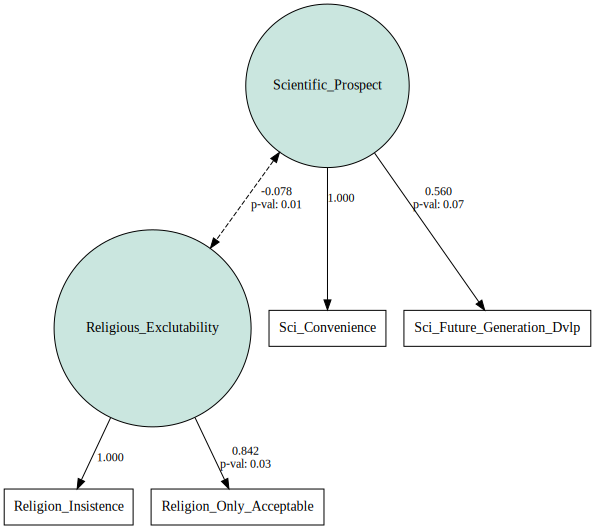

In [295]:
viz = semopy.semplot(mod, 'model.png', plot_covs=True)
viz

In [237]:
stats = semopy.calc_stats(mod)
print(stats.T.round(3))

                 Value
DoF              1.000
DoF Baseline     6.000
chi2            11.883
chi2 p-value     0.001
chi2 Baseline  635.326
CFI              0.983
GFI              0.981
AGFI             0.888
NFI              0.981
TLI              0.896
RMSEA            0.103
AIC             17.977
BIC             62.316
LogLik           0.012


# Path Analysis (Linear Regression)

### Design Matrix with `patsy`

In [239]:
df['Religious_Excludability'] = df['Religion_Insistence'] + df['Religion_Only_Acceptable']
df['Scientific_Prospect'] = df['Sci_Convenience'] + df['Sci_Future_Generation_Dvlp']

In [241]:
df[['Religious_Excludability','Scientific_Prospect']].corr()

,Religious_Excludability,Scientific_Prospect
Religious_Excludability,1.000000,-0.036039
Scientific_Prospect,-0.036039,1.000000


In [240]:
df[['Religious_Excludability','Scientific_Prospect']].describe()

,Religious_Excludability,Scientific_Prospect
count,1.019000e+03,1.019000e+03
mean,4.494279e-17,1.457781e-16
std,1.705146e+00,1.767017e+00
min,-3.393776e+00,-6.070995e+00
25%,1.613053e-02,-1.290915e+00
50%,1.613053e-02,1.184873e-01
75%,1.613053e-02,1.497111e+00
max,6.835943e+00,2.477750e+00


In [243]:
from patsy import dmatrix

In [245]:
formula = "(" + " + ".join(list(df[['Religious_Excludability','Scientific_Prospect']].columns)) + ")" + "**2"
formula

'(Religious_Excludability + Scientific_Prospect)**2'

In [246]:
x_poly = dmatrix(formula, data = df[['Religious_Excludability','Scientific_Prospect']], return_type = "dataframe")

In [247]:
x_poly['Religious_Excludability_sq'] = x_poly['Religious_Excludability'] ** 2
x_poly['Scientific_Prospect_sq'] = x_poly['Scientific_Prospect'] ** 2

In [248]:
x_poly

,Intercept,Religious_Excludability,Scientific_Prospect,Religious_Excludability:Scientific_Prospect,Religious_Excludability_sq,Scientific_Prospect_sq
0,1.0,0.016131,0.118487,0.001911,0.000260,0.014039
1,1.0,0.016131,-0.892929,-0.014403,0.000260,0.797323
2,1.0,0.016131,0.578029,0.009324,0.000260,0.334117
3,1.0,0.016131,2.477750,0.039967,0.000260,6.139243
4,1.0,0.016131,0.578029,0.009324,0.000260,0.334117
...,...,...,...,...,...,...
1014,1.0,-1.549492,-2.240775,3.472062,2.400925,5.021073
1015,1.0,0.016131,-0.831373,-0.013410,0.000260,0.691181
1016,1.0,0.016131,0.578029,0.009324,0.000260,0.334117
1017,1.0,0.016131,-6.070995,-0.097928,0.000260,36.856983


In [249]:
df = pd.concat([x_poly,df['Existentialism']], axis=1)

In [250]:
df

,Intercept,Religious_Excludability,Scientific_Prospect,Religious_Excludability:Scientific_Prospect,Religious_Excludability_sq,Scientific_Prospect_sq,Existentialism
0,1.0,0.016131,0.118487,0.001911,0.000260,0.014039,1.120343
1,1.0,0.016131,-0.892929,-0.014403,0.000260,0.797323,-0.078848
2,1.0,0.016131,0.578029,0.009324,0.000260,0.334117,-0.078848
3,1.0,0.016131,2.477750,0.039967,0.000260,6.139243,-0.078848
4,1.0,0.016131,0.578029,0.009324,0.000260,0.334117,-0.078848
...,...,...,...,...,...,...,...
1014,1.0,-1.549492,-2.240775,3.472062,2.400925,5.021073,-0.078848
1015,1.0,0.016131,-0.831373,-0.013410,0.000260,0.691181,-0.078848
1016,1.0,0.016131,0.578029,0.009324,0.000260,0.334117,-0.078848
1017,1.0,0.016131,-6.070995,-0.097928,0.000260,36.856983,-0.078848


In [252]:
df.columns = ['Intercept', 'Religious_Excludability', 'Scientific_Prospect',
       'Religious_Excludability_Scientific_Prospect',
       'Religious_Excludability_sq', 'Scientific_Prospect_sq',
       'Existentialistic_Pondering']

In [258]:
from sklearn import preprocessing

arr_df = df.to_numpy()
df_scaled = preprocessing.StandardScaler().fit_transform(arr_df)
df_scaled

array([[ 0.        ,  0.00946455,  0.06708791, ..., -0.47721873,
        -0.65972802,  1.12034275],
       [ 0.        ,  0.00946455, -0.50557958, ..., -0.47721873,
        -0.49331478, -0.07884765],
       [ 0.        ,  0.00946455,  0.32728174, ..., -0.47721873,
        -0.59172559, -0.07884765],
       ...,
       [ 0.        ,  0.00946455,  0.32728174, ..., -0.47721873,
        -0.59172559, -0.07884765],
       [ 0.        ,  0.00946455, -3.43741816, ..., -0.47721873,
         7.16777577, -0.07884765],
       [ 0.        ,  0.00946455, -0.7483468 , ..., -0.47721873,
        -0.29157753, -1.27803805]])

In [259]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df = df_scaled

In [ ]:
Faith_Religion ~~ Faith_Science
Faith_Religion ~~ Faith_Religion_Faith_Science
Faith_Religion ~~ Faith_Religion_sq
Faith_Religion ~~ Faith_Science_sq
Faith_Science ~~ Faith_Religion_Faith_Science
Faith_Science ~~ Faith_Religion_sq
Faith_Science ~~ Faith_Science_sq
Faith_Religion_Faith_Science ~~ Faith_Religion_sq
Faith_Religion_Faith_Science ~~ Faith_Science_sq
Faith_Religion_sq ~~ Faith_Science_sq

In [267]:
eq = """# structural regression
Existentialistic_Pondering ~ Religious_Excludability + Scientific_Prospect + Religious_Excludability_Scientific_Prospect + Religious_Excludability_sq + Scientific_Prospect_sq
"""

In [268]:
mod = Model(eq)

In [269]:
res_opt = mod.fit(df)
estimates = mod.inspect(std_est=True)

In [270]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully.
Objective value: 0.000
Number of iterations: 10
Params: -0.164 0.002 0.008 0.083 -0.000 0.976


In [271]:
df_estimates = pd.DataFrame(estimates)
df_estimates

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,Existentialistic_Pondering,~,Religious_Excludability,-0.164447,-0.164432,0.033079,-4.971387,6.647554e-07
1,Existentialistic_Pondering,~,Scientific_Prospect,0.001976,0.001975,0.033621,0.058757,9.531453e-01
2,Existentialistic_Pondering,~,Religious_Excludability_Scientific_Prospect,0.007872,0.007872,0.031134,0.252858,8.003778e-01
3,Existentialistic_Pondering,~,Religious_Excludability_sq,0.083441,0.083433,0.033151,2.516953,1.183746e-02
4,Existentialistic_Pondering,~,Scientific_Prospect_sq,-0.000125,-0.000125,0.033642,-0.003722,9.970305e-01
5,Existentialistic_Pondering,~~,Existentialistic_Pondering,0.975673,0.975498,0.043225,22.572107,0.000000e+00


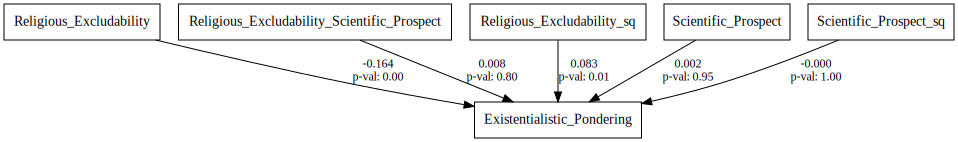

In [272]:
viz = semopy.semplot(mod, 'model.png')
viz

In [273]:
stats = semopy.calc_stats(mod)
print(stats.T.round(3))

                 Value
DoF             15.000
DoF Baseline    20.000
chi2             0.000
chi2 p-value     1.000
chi2 Baseline  337.778
CFI              1.047
GFI              1.000
AGFI             1.000
NFI              1.000
TLI              1.063
RMSEA            0.000
AIC             12.000
BIC             41.559
LogLik           0.000


### Statistical Inference

In [274]:
df.columns

Index(['Intercept', 'Religious_Excludability', 'Scientific_Prospect',
       'Religious_Excludability_Scientific_Prospect',
       'Religious_Excludability_sq', 'Scientific_Prospect_sq',
       'Existentialistic_Pondering'],
      dtype='object')

In [275]:
df.drop(columns="Intercept")

,Religious_Excludability,Scientific_Prospect,Religious_Excludability_Scientific_Prospect,Religious_Excludability_sq,Scientific_Prospect_sq,Existentialistic_Pondering
0,0.009465,0.067088,0.033098,-0.477219,-0.659728,1.120343
1,0.009465,-0.505580,0.028206,-0.477219,-0.493315,-0.078848
2,0.009465,0.327282,0.035320,-0.477219,-0.591726,-0.078848
3,0.009465,1.402910,0.044508,-0.477219,0.641608,-0.078848
4,0.009465,0.327282,0.035320,-0.477219,-0.591726,-0.078848
...,...,...,...,...,...,...
1014,-0.909161,-1.268734,1.073536,-0.082770,0.404046,-0.078848
1015,0.009465,-0.470726,0.028504,-0.477219,-0.515865,-0.078848
1016,0.009465,0.327282,0.035320,-0.477219,-0.591726,-0.078848
1017,0.009465,-3.437418,0.003163,-0.477219,7.167776,-0.078848


                                OLS Regression Results                                
Dep. Variable:     Existentialistic_Pondering   R-squared:                       0.025
Model:                                    OLS   Adj. R-squared:                  0.020
Method:                         Least Squares   F-statistic:                     5.089
Date:                        Wed, 30 Dec 2020   Prob (F-statistic):           0.000129
Time:                                20:06:49   Log-Likelihood:                -1433.3
No. Observations:                        1019   AIC:                             2879.
Df Residuals:                            1013   BIC:                             2908.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------

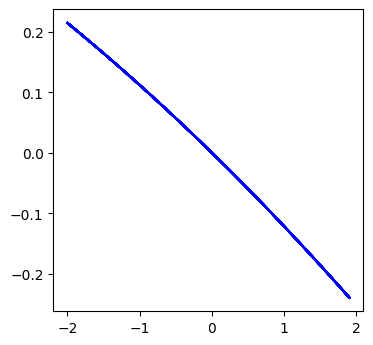

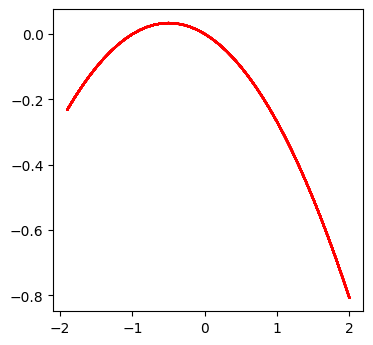

In [277]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

bootnum = 10000
X = ['Religious_Excludability', 'Scientific_Prospect',
       'Religious_Excludability_Scientific_Prospect',
       'Religious_Excludability_sq', 'Scientific_Prospect_sq']
Y = ['Existentialistic_Pondering']

df_x = df[X] 
df_y = df[Y] 

scaler = StandardScaler()
pre_x = scaler.fit_transform(df_x)
x = np.concatenate((np.ones((1019,1)),pre_x),axis = 1) # Sample size
y = scaler.fit_transform(df_y)
x = pd.DataFrame(data=x,columns=['Intercept'] + list(df_x.columns))
y = pd.DataFrame(data=y,columns=list(df_y.columns))
poly_reg = sm.OLS(y, x).fit()

print(poly_reg.summary())

# Here's the block for Bootstrapping
boot_samples = []
for i in range(bootnum):
  df_to_be_boot = df[X + Y]
  boot_df = df_to_be_boot.sample(n = 1019, replace = True) # Sample size

  df_x = boot_df[X]
  df_y = boot_df[Y] 

  scaler = StandardScaler()
  pre_x = scaler.fit_transform(df_x)
  x = np.concatenate((np.ones((1019,1)),pre_x),axis = 1) # Sample size
  y = scaler.fit_transform(df_y)
  x = pd.DataFrame(data=x,columns=['Intercept'] + list(df_x.columns))
  y = pd.DataFrame(data=y,columns=list(df_y.columns))
  poly_reg = sm.OLS(y, x).fit() 

  # Along the Line of Congruency
  a1 = poly_reg.params[1] + poly_reg.params[2]
  a2 = poly_reg.params[3] + poly_reg.params[4] + poly_reg.params[5]

  # Along the Line of Incongruency
  a3 = poly_reg.params[1] - poly_reg.params[2]
  a4 = poly_reg.params[3] - poly_reg.params[4] + poly_reg.params[5]
  a = [a1,a2,a3,a4]
  boot_samples.append(a)
  arr_boot_samples = np.array(boot_samples)
  arr_boot_samples = arr_boot_samples.T
  a_CI = []
  for j in range(4):
    lower_boundary = np.quantile(arr_boot_samples[j], 0.05) # Probably should go to 0.025
    upper_boundary = np.quantile(arr_boot_samples[j], 0.95) # Probably should go to 0.975
    confidence_interval = [lower_boundary,upper_boundary]
    a_CI.append(confidence_interval)
a_CI = np.array(a_CI)
a_CI = pd.DataFrame(a_CI, index = ['a1','a2','a3','a4'],columns=['lower_boundary', 'upper_boundary'])

print(a_CI)

# Block of Viz
import plotly.graph_objects as go

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
x, y = np.meshgrid(x, y)
z = poly_reg.params[0] + poly_reg.params[1]*x + poly_reg.params[2]*y + poly_reg.params[3]*(x**2) + poly_reg.params[4]*(x*y) + poly_reg.params[5]*(y**2)


fig = go.Figure(data=[go.Surface(z=z,x=x,y=y,colorscale='YlGnBu')])

fig.update_layout(title='Surface Plot', 
                  scene_aspectmode='cube', 
                  autosize=False,
                  scene = dict(
                    xaxis_title='Religious_Excludability',
                    yaxis_title='Scientific_Prospect',
                    zaxis_title='Existentialistic_Pondering'),
                  width=800, height=800,
                  margin=dict(l=50, r=50, b=50, t=50))

fig.show()

# Projection along the LOC
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
x, y = np.meshgrid(x, y)
x = y
z = poly_reg.params[0] + poly_reg.params[1]*x + poly_reg.params[2]*y + poly_reg.params[3]*(x**2) + poly_reg.params[4]*(x*y) + poly_reg.params[5]*(y**2)
fig = plt.figure(figsize = (4, 4), dpi = 100)
plt.plot(x, z, "b")

# Projection along the LOIC
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
x, y = np.meshgrid(x, y)
x = -y
z = poly_reg.params[0] + poly_reg.params[1]*x + poly_reg.params[2]*y + poly_reg.params[3]*(x**2) + poly_reg.params[4]*(x*y) + poly_reg.params[5]*(y**2)
fig = plt.figure(figsize = (4, 4), dpi = 100)
plt.plot(x, z, "r")